In [14]:
import numpy as np
import polars as pl

In [33]:
data = pl.read_excel("iris_data.xlsx")
data.head()

A,B,C,D,Label
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""


In [34]:
y_train = np.array(data.drop_in_place("Label").to_dummies())
x_train = np.array([row for row in data.rows()])
# for linha in x_train.T:
#     linha /= max(linha)

In [60]:
import mlp

model = mlp.NeuralNetwork(
    mlp.Layer(4, 12, mlp.Tanh()),
    mlp.Layer(12, 3, mlp.Tanh()),
)
model.fit(x_train, y_train, batch_size=15, epochs=20_000, alpha=0.005, print_mse=False)

Output()

In [ ]:
mlp.evaluate(model, x_train, y_train, total=150)

98.0

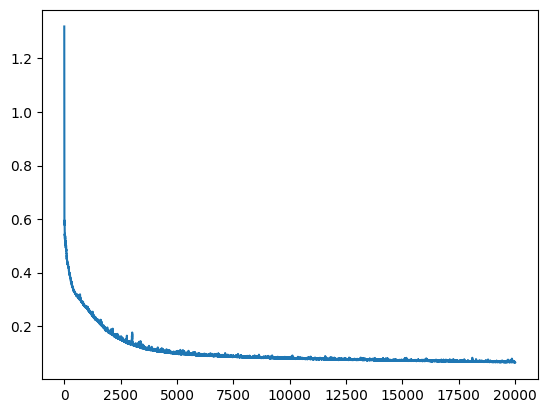

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.all_mse);